In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
from numpy import *
import camb
from camb import model, initialpower

In [2]:
# Configuración de parámetros
# Rango de Redshift
zs = logspace(5, -1, 500)  

# Parámetros actuales del universo
pars = camb.set_params(
    H0=67.5,       # Constante de Hubble [km/s/Mpc]
    ombh2=0.022,   # densidad de bariones
    omch2=0.122,   # densidad de CDM
    mnu=0.06,      # suma de masas de neutrinos [eV]
    omk=0,         # curvatura (universo plano)
    tau=0.06       # reionización
)

results = camb.get_results(pars)

In [3]:
# Componentes del universo
list_components = ['tot', 'K', 'cdm', 'baryon', 'photon', 'neutrino', 'nu', 'de']

# Parámetros de densidad
Om_m  = results.get_Omega('cdm', z = zs) + results.get_Omega('baryon', z = zs)
Om_r  = results.get_Omega('photon', z = zs) + results.get_Omega('neutrino', z = zs) + results.get_Omega('nu', z = zs)
Om_de = results.get_Omega('de', z = zs)
Om_K  = results.get_Omega('K', z = zs)

Om_tot = Om_m + Om_r + Om_de + Om_K

# Valores de Ω a tiempo presente
print('   Matter:  Ω_m(z=0)=', Om_m[0])
print('Radiation: Ω_r(z=0) =', Om_r[0])
print(' D.Energy: Ω_DE(z=0)=', Om_de[0])
print('Curvature:  Ω_K(z=0)=', Om_K[0])
print('   Total: Ω_tot(z=0)=', Om_tot[0])

   Matter:  Ω_m(z=0)= 0.03328231729582392
Radiation: Ω_r(z=0) = 0.9667176827041759
 D.Energy: Ω_DE(z=0)= 7.186546262162454e-17
Curvature:  Ω_K(z=0)= 0.0
   Total: Ω_tot(z=0)= 0.9999999999999999


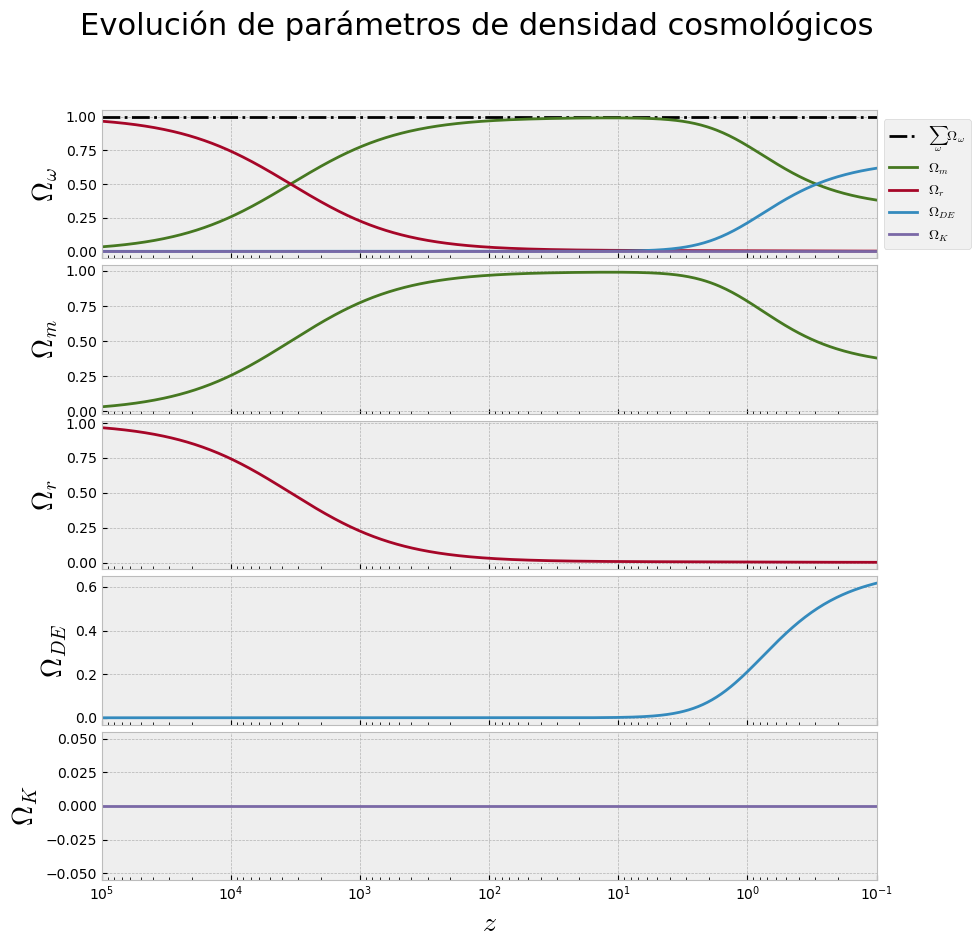

In [4]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(5, hspace=0.05)
axs = gs.subplots(sharex=True)

fig.suptitle("Evolución de parámetros de densidad cosmológicos", fontsize=22)

axs[0].semilogx(zs, Om_tot , color='black', linestyle='-.', label = r'$\sum_{\omega}\Omega_{\omega}$')
axs[0].semilogx(zs, Om_m, color='C3', label = r'$\Omega_{m}$')
axs[0].semilogx(zs, Om_r, color='C1', label = r'$\Omega_{r}$')
axs[0].semilogx(zs, Om_de, color='C0', label = r'$\Omega_{DE}$')
axs[0].semilogx(zs, Om_K, color='C2', label = r'$\Omega_{K}$')
axs[0].set_ylabel(r'$\Omega_{\omega}$', size=20)
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

# Matter
axs[1].semilogx(zs, Om_m, color='C3')
axs[1].set_ylabel(r'$\Omega_{m}$', size=20)
# Radiation
axs[2].semilogx(zs, Om_r, color='C1')
axs[2].set_ylabel(r'$\Omega_{r}$', size=20)
# Dark Energy
axs[3].semilogx(zs, Om_de, color='C0')
axs[3].set_ylabel(r'$\Omega_{DE}$', size=20)
# Curvature
axs[4].semilogx(zs, Om_K, color='C2')
axs[4].set_ylabel(r'$\Omega_{K}$', size=20)


for ax in axs:
    ax.label_outer()
    
axs[0].set_xlim(zs[0], zs[-1])
axs[4].set_xlabel(r'$z$', size=20)

plt.savefig("P6-Grafico.png")